In [2]:
pip install torchero

     |████████████████████████████████| 61kB 2.8MB/s 


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
!unzip /content/drive/My\ Drive/DropOut/CNN_gatos_perros/CATS_DOGS.zip -d . > /dev/null

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models # add models to the list
from torchvision.utils import make_grid
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import torchero
# ignore harmless warnings
#import warnings
#warnings.filterwarnings("ignore")

In [ ]:
pip show torchero

Name: torchero
Version: 0.0.2
Summary: A pluggable & extensible trainer for pytorch
Home-page: http://github.com/juancruzsosa/torchero
Author: Juan Cruz Sosa
Author-email: juancruzsosa.92@gmail.com
License: MIT
Location: /usr/local/lib/python3.6/dist-packages
Requires: pyyaml, tqdm, torch, requests
Required-by: 


In [6]:
# Define transformaciones para hacerle a las fotos
train_transform = transforms.Compose([
        transforms.RandomRotation(10),      # rotate +/- 10 degrees
        transforms.RandomHorizontalFlip(),  # reverse 50% of images
        transforms.Resize(224),             # resize shortest side to 224 pixels
        transforms.CenterCrop(224),         # crop longest side to 224 pixels at center
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])

test_transform = transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])

In [13]:
# Data prepairing
#root = '../DropOut/CNN_gatos_perros/CATS_DOGS'
root = 'CATS_DOGS'#'/content/drive/My Drive/DropOut/CNN_gatos_perros/CATS_DOGS'
train_data = datasets.ImageFolder(os.path.join(root, 'train'), transform=train_transform)
test_data = datasets.ImageFolder(os.path.join(root, 'test'), transform=test_transform)

#torch.manual_seed(801)
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)
test_loader = DataLoader(test_data, batch_size=100, shuffle=False)

class_names = train_data.classes

print(class_names)
print(f'Training images available: {len(train_data)}')
print(f'Testing images available:  {len(test_data)}')

['CAT', 'DOG']
Training images available: 18743
Testing images available:  6251


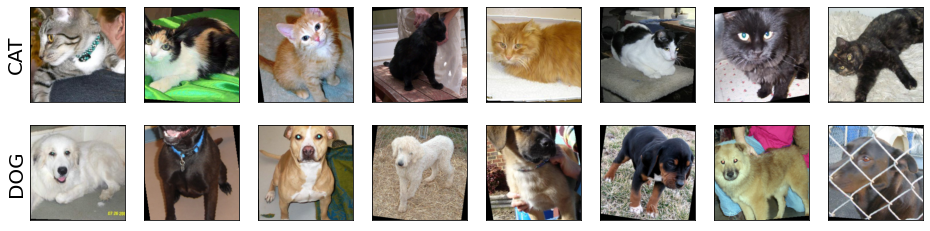

In [7]:
from torchero.utils import show_imagegrid_dataset
show_imagegrid_dataset(train_data,8)

In [18]:
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(nn.Conv2d(3, 32, 3, 1,padding=1),
                                     nn.ReLU(),
                                     nn.Conv2d(32, 32, 3, 1,padding=1),
                                     nn.ReLU(),
                                     nn.MaxPool2d(2),
                                     nn.Dropout(0.5),
                                     nn.Conv2d(32, 64, 3, 1,padding=1),
                                     nn.ReLU(),
                                     nn.Conv2d(64, 64, 3, 1,padding=1),
                                     nn.ReLU(),
                                     nn.MaxPool2d(2),
                                     nn.Dropout(0.5),
                                     nn.Conv2d(64, 128, 3, 1,padding=1),
                                     nn.ReLU(),
                                     nn.Conv2d(128, 128, 3, 1,padding=1),
                                     nn.ReLU(),
                                     nn.MaxPool2d(2),
                                     nn.Dropout(0.5),
                                     nn.Conv2d(128, 256, 3, 1,padding=1),
                                     nn.ReLU(),
                                     nn.Conv2d(256, 256, 3, 1,padding=1),
                                     nn.ReLU(),
                                     nn.MaxPool2d(2),
                                     nn.Dropout(0.5),
                                     nn.Flatten(),
                                     nn.Linear(14*14*256,256),
                                     nn.ReLU(),
                                     nn.Linear(256,128),
                                     nn.ReLU(),
                                     nn.Linear(128,2),
                                     )
    def forward(self, X):
        X = self.model(X)
        return X

In [19]:
torch.manual_seed(8075)
model = ConvolutionalNetwork()
criterion = nn.CrossEntropyLoss()     # La loss hace el softmax de la salida. Por eso no se pone arriba
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
model.cuda()

ConvolutionalNetwork(
  (model): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Dropout(p=0.5, inplace=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Dropout(p=0.5, inplace=False)
    (12): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU()
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Dropout(p=0.5, inplace=False)
    (18): Conv2d(128, 256, ker

In [48]:
model(torch.rand(10,3,224,224).cuda()).shape     # Pruebo con un tensor random para ver la salida del modelo.
# que tiene que ser el batch size (10 en este caso) y 2 por las clases.

torch.Size([10, 2])

In [10]:
from torchero import SupervisedTrainer
from torchero.callbacks import ProgbarLogger as Logger
from torchero.callbacks import ModelCheckpoint, CSVLogger

In [20]:
trainer = SupervisedTrainer(model, criterion,optimizer,
                           callbacks = [Logger(notebook=True,monitors=['train_acc','val_acc','train_loss','val_loss']),
                                        ModelCheckpoint('/content/drive/My Drive/DropOut/CNN_gatos_perros/Models_NR_drop_maxpool/',monitor='val_acc',mode='max'),
                                        CSVLogger('/content/drive/My Drive/DropOut/CNN_gatos_perros/Models_NR_drop_maxpool/metricsCNN_NR_drop_maxpool.csv')],acc_meters={'acc':'categorical_accuracy'})
trainer.cuda()

In [21]:
trainer.train(train_loader,test_loader,epochs=50)

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

In [ ]:
trainer.history.epoch_plot('train_acc')
trainer.history.epoch_plot('val_acc')